In [31]:
%matplotlib inline

In [32]:
from auto_nav__experimentation import book_format
book_format.set_style()


# Chapter 8: Designing Kalman Filters<a href="#kalman_bayesian_filters_in_python" id="kalman_bayesian_filters_in_python_ref"><sup>1</sup></a>

"Filter": In signal processing, a filter is a device or process/algorithm that removes some unwanted components or features from a signal.<br>

<ins>"Kalman Filter":</ins> "In statistics and control theory, Kalman filtering, also known as linear quadratic estimation (LQE), is an algorithm that uses a series of measurements observed over time, containing statistical noise and other inaccuracies, and produces estimates of unknown variables that tend to be more accurate than those based on a single measurement alone, by estimating a joint probability distribution over the variables for each timeframe."<a href="#kalman_filter_wikipedia" id="kalman_filter_wikipedia_ref"><sup>2</sup></a>

<ins>Task Goal:</ins> <br>
The tracking of a robot in 2D space. Initially a simple noisy sensor which generates noisy outputs of (x,y) coordinate positions will be used. The generated noisy (x,y) coordinate positions, in 2D space, outputs will be filtered in order to generate a 2D track.

---

<a id="kalman_bayesian_filters_in_python" href="#kalman_bayesian_filters_in_python_ref"><sup>1</sup></a>[Kalman and Bayesian Filters in Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python) by Roger R Labbe Jr, August 29 2018<br>
<a id="kalman_filter_wikipedia" href="#kalman_filter_wikipedia_ref"><sup>2</sup></a>[Kalman filter
](https://en.wikipedia.org/wiki/Kalman_filter)-Wikipedia

In [33]:
import numpy as np

class PosSensor(object):
	def __init__(self, pos=(0, 0), vel=(0, 0), noise_std=1.):
		self.vel = vel
		self.noise_std = noise_std
		self.pos = [pos[0], pos[1]]
		self.pos_hist = []

	def read(self):
		self.pos[0] += self.vel[0]
		self.pos[1] += self.vel[1]

		# X(t) = [x_1(t), x_2(t)] <=> (x, y)
		# x_1(t) = x_pred(t) + noise(t)
		# x_2(t) = x_pred(t) + noise(t)
		x1_pred = self.pos[0] + np.random.randn() * self.noise_std
		x2_pred = self.pos[1] + np.random.randn() * self.noise_std
		noisy_pos_coord = [x1_pred, x2_pred]
		self.pos_hist.append(noisy_pos_coord)
		return noisy_pos_coord
		# return [self.pos[0] + np.random.randn() * self.noise_std,
		# 		self.pos[1] + np.random.randn() * self.noise_std]

$\mathbf{X}(t) = [x_1(t), x_2(t)]$ &nbsp;&nbsp;&nbsp;   where: &nbsp;&nbsp;&nbsp; $x=x_{1}(t)$ &nbsp;&&nbsp;
 $y=x_{2}(t)$<br>


 At each time (step), t, the true value/state of $x_{1}(t)$ is equal to the predicted value/state outputted by an imperfect model plus some noise (generated from some unknown process).

$x_{1}(t) = x_{1_{pred}}(t) + noise(t)$<br>
$x_{2}(t) = x_{2_{pred}}(t) + noise(t)$<br>



In [34]:
import matplotlib.pyplot as plt
# import numpy as np
# from kf_book.book_plots import plot_measurements
from auto_nav__experimentation.plotting_tools_from_book import plot_measurements

pos, vel = (4, 3), (2, 1)
sensor = PosSensor(pos, vel, noise_std=1)
ps = np.array([sensor.read() for _ in range(50)])

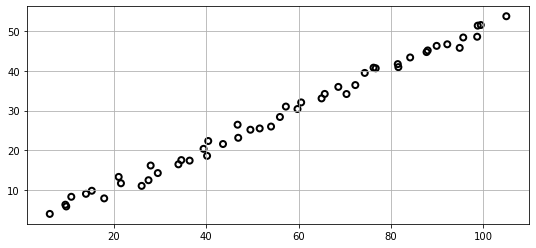

In [35]:
plot_measurements(ps[:, 0], ps[:, 1])
plt.grid(True)

### Choosing State Variables

### Design The State Transition Function

The state transition function is implemented as a matrix $\mathbf F$ that we multiply with the previous state of our system to get the next state




